In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
file_path =  '../input/train_normal/000.wav'



In [32]:
y, sr = librosa.load(file_path, sr=None)


In [33]:
import glob

category = 'valve'
train_test = 'train'

def read_data(train_test):
    files = sorted(glob.glob(f'../input/{train_test}/*.wav'))
    dataset = []
    for file_name in files:
        y, sr = librosa.load(file_name, sr=None)
        dataset.append(y)

    return np.array(dataset)


In [34]:
y

array([-0.00195312,  0.00018311,  0.00149536, ..., -0.02090454,
       -0.01574707, -0.01330566], dtype=float32)

In [35]:
y.shape

(160000,)

In [36]:
sr

16000

In [37]:
normal = read_data('train_normal')

In [38]:
normal_mean = np.sqrt(np.mean(normal**2, axis=1))

(array([18., 59., 98., 65., 35., 12.,  9.,  1.,  2.,  1.]),
 array([0.01099614, 0.01106011, 0.01112409, 0.01118806, 0.01125204,
        0.01131601, 0.01137999, 0.01144396, 0.01150793, 0.01157191,
        0.01163588], dtype=float32),
 <BarContainer object of 10 artists>)

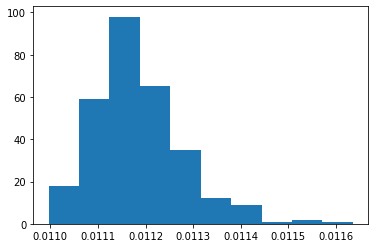

In [39]:
plt.hist(normal_mean)

In [40]:
normal

array([[-0.00195312,  0.00018311,  0.00149536, ..., -0.02090454,
        -0.01574707, -0.01330566],
       [-0.00796509, -0.00558472, -0.00463867, ...,  0.00073242,
         0.00463867,  0.00518799],
       [-0.01135254, -0.01519775, -0.01611328, ..., -0.0005188 ,
         0.00616455,  0.00460815],
       ...,
       [ 0.0168457 ,  0.01611328,  0.00543213, ..., -0.02703857,
        -0.02157593, -0.01675415],
       [ 0.0118103 ,  0.01306152,  0.01245117, ..., -0.00183105,
        -0.00485229, -0.00613403],
       [-0.01730347, -0.01644897, -0.01266479, ...,  0.00061035,
        -0.00637817, -0.00241089]], dtype=float32)

In [41]:
normal_zc = np.sum(librosa.zero_crossings(y),axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [42]:
train_df = pd.DataFrame()

In [43]:
train_df['label'] = np.concatenate([np.zeros(5), np.ones(6)])

In [44]:
train_df

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
